In [3]:
# Libraries
from waveome.model_search import GPKernelSearch
import pandas as pd

In [4]:
# Read data in
df = pd.read_excel("newdata.xlsx")

In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Need to recode categorical as numeric for search
df["Breast milk collected"], bmc_values = pd.factorize(df["Breast milk collected"])

In [7]:
# Specify covariates
covariate_list = [
    "individual_id", "age stool sample", 
    "birth weight", "Age at breast milk sample", 
    "Gestational by weight percentagete",
    "Breast milk collected"
]

In [8]:
# Load up search object
gps = GPKernelSearch(
    X=df[covariate_list].astype(float),
    Y=df.drop(columns=covariate_list).drop(columns="sample_id"),
    unit_col="individual_id",
    categorical_vars=["Breast milk collected"]
)

In [9]:
# Run search (takes ~4mins)
gps.run_search(random_seed=1)

Kernel search: 100%|██████████| 3/3 [15:56<00:00, 318.73s/it]


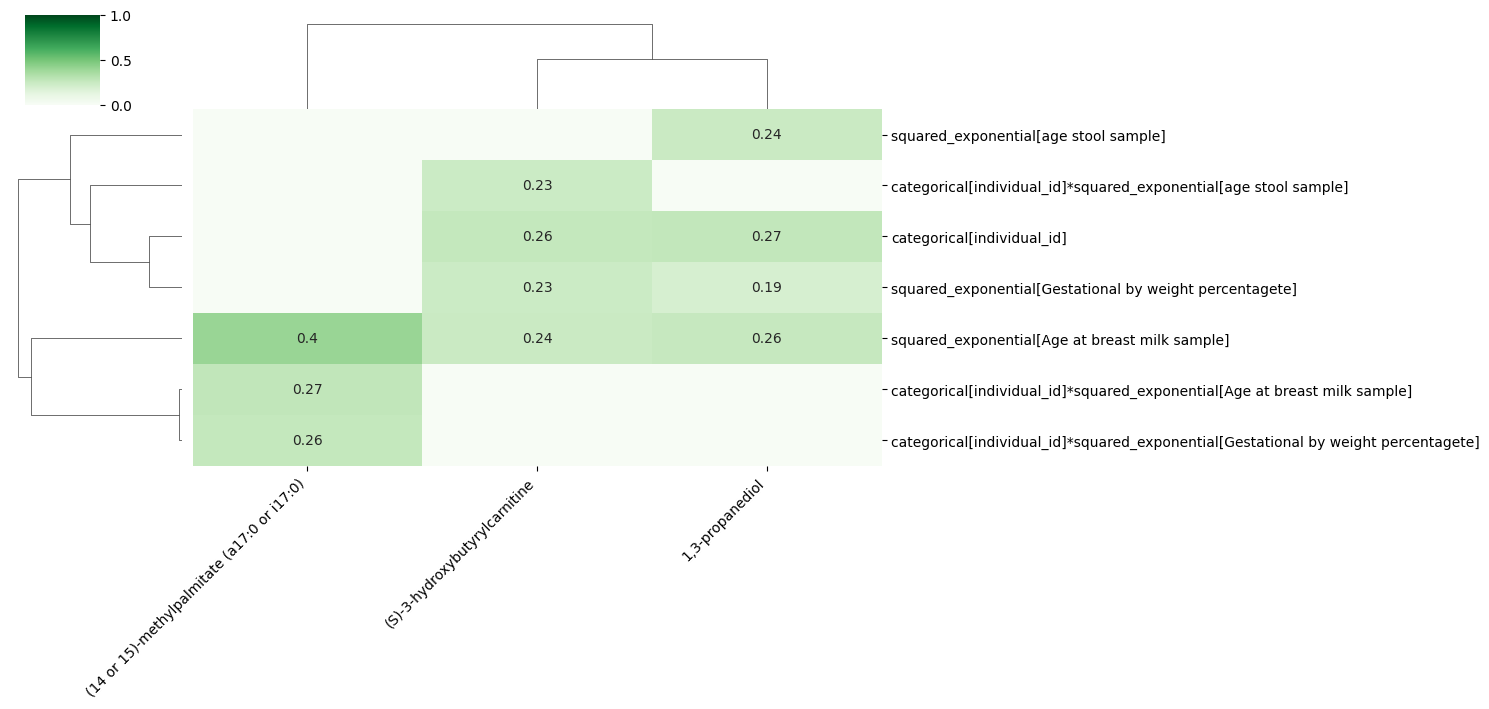

In [10]:
# Check out high level results
gps.plot_heatmap()